In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.text import *
import numpy as np
from sklearn.model_selection import train_test_split
import pickle
import sentencepiece as spm

In [3]:
import fastai, torch
fastai.__version__ , torch.__version__

('1.0.40', '1.0.0')

In [4]:
torch.cuda.set_device(0)

In [6]:
path = Path('/home/gaurav/PycharmProjects/nlp-for-sanskrit/language-model')

In [7]:
p = path.glob('SanskritWikipediaArticles/*')
files = [x for x in p if x.is_file()]

In [60]:
len(files)

22273

In [61]:
train_files, test_files = train_test_split(files, test_size=0.3)

In [62]:
len(train_files), len(test_files)

(15591, 6682)

In [63]:
train_files[0]

PosixPath('/home/gaurav/PycharmProjects/nlp-for-sanskrit/language-model/SanskritWikipediaArticles/12959.pkl')

In [64]:
str(train_files[0]).split('/')[-1][:-4]

'12959'

In [65]:
# Preparing dataset for fastai
for file in train_files:
    with open(file, 'rb') as f:
        text = pickle.load(f)
    with open(path/'SanskritDataset'/'train'/(str(file).split('/')[-1][:-4]+'.txt'), "w") as text_file:
        text_file.write(text)

In [66]:
for file in test_files:
    with open(file, 'rb') as f:
        text = pickle.load(f)
    with open(path/'SanskritDataset'/'valid'/(str(file).split('/')[-1][:-4]+'.txt'), "w") as text_file:
        text_file.write(text)

In [67]:
class SanskritTokenizer(BaseTokenizer):
    def __init__(self, lang:str):
        self.lang = lang
        self.sp = spm.SentencePieceProcessor()
        self.sp.Load(str(path/"../tokenizer/sanskrit_lm.model"))
        
    def tokenizer(self, t:str) -> List[str]:
        return self.sp.EncodeAsPieces(t)

In [68]:
sp = spm.SentencePieceProcessor()
sp.Load(str(path/"../tokenizer/sanskrit_lm.model"))
itos = [sp.IdToPiece(int(i)) for i in range(20000)]

In [69]:
itos

['<unk>',
 '<s>',
 '</s>',
 '▁।',
 '▁',
 'ं',
 ',',
 'ः',
 '-',
 'म्',
 'स्य',
 'े',
 '▁च',
 '▁अस्ति',
 '।',
 '.',
 '▁इति',
 'ा',
 '▁आसीत्',
 'ाः',
 '·',
 '▁अपि',
 '▁एव',
 '▁भवति',
 '▁न',
 '▁सन्ति',
 'ेन',
 'ि',
 '▁अस्य',
 'ो',
 'ी',
 'ानि',
 '▁सः',
 '▁तस्य',
 '्',
 "▁'",
 'ेषु',
 ':',
 '▁“',
 'ानां',
 '▁स्म',
 '▁अभवत्',
 '▁q',
 '▁स',
 'ाय',
 '▁�',
 '▁अत्र',
 'म',
 "'",
 '▁वर्षे',
 '▁सह',
 '▁अ',
 'X',
 '”',
 'ात्',
 '▁अतः',
 '▁अस्मिन्',
 'न',
 '▁तमे',
 '▁यत्',
 '▁तत्र',
 'ौ',
 'तः',
 'ैः',
 'क',
 '▁तदा',
 'र',
 '▁|',
 'ान्',
 '▁"',
 'श',
 '▁इदं',
 '▁तु',
 '▁सा',
 '▁जनाः',
 '▁वर्तते',
 '▁नाम',
 'या',
 '’',
 'न्',
 '▁भारतस्य',
 'ता',
 '्य',
 '"',
 '▁–',
 'त',
 '▁स्व',
 '▁तथा',
 '▁तेन',
 'ति',
 'ेण',
 '�',
 'स',
 '▁वा',
 'राज्यस्य',
 '▁आ',
 '▁ततः',
 'ल',
 'श्च',
 '▁भवन्ति',
 '▁इत्यस्य',
 '▁अयं',
 '▁यदा',
 'याः',
 '▁प्रति',
 '▁-',
 'स्',
 'त्',
 'त्वेन',
 'योः',
 '▁•',
 '▁ते',
 '▁आसन्',
 '▁‘',
 '▁यथा',
 'व',
 '▁किन्तु',
 '▁प्र',
 '▁परन्तु',
 'नगरं',
 '▁तस्मिन्',
 'य',
 '▁वि',
 '▁हि',
 '▁एत

In [70]:
# 20,000 is the vocab size that we chose in sentencepiece
sanskrit_vocab = Vocab(itos)

In [71]:
tokenizer = Tokenizer(tok_func=SanskritTokenizer, lang='sa')

In [72]:
tokenizer.special_cases

['xxunk', 'xxpad', 'xxbos', 'xxfld', 'xxmaj', 'xxup', 'xxrep', 'xxwrep']

In [73]:
data_lm = TextLMDataBunch.from_folder(path=path/'SanskritDataset', tokenizer=tokenizer, vocab=sanskrit_vocab)

In [74]:
data_lm.batch_size

64

In [75]:
data_lm.save()

In [77]:
data_lm.show_batch()

idx,text
0,"▁ x x bo s ▁मणिपुर ▁राज्ये ▁स्थितः ▁एकः ▁मण्डल ▁| ▁उख ्र ुल् ▁मण्डल ▁चन्द ॆ ल् ▁मण्डल ▁च ूर चन्द पुर ▁मण्डल ▁तम ॆ ङ ल ॊ ङ् ▁मण्डल ▁थ ॊ उ बाल् ▁मण्डल ▁पश्चिम ▁इम्फाल ् ▁मण्डल ▁पूर्व ▁इम्फाल ् ▁मण्डल ▁बि श् णु पूर् ▁मण्डल ▁स ॆ ना पति ▁मण्डल ▁ x x bo s ▁सिंह पुरी , ▁अ डु सा , ▁वास कः ▁इति ▁कथ्यमान"
1,ः ▁पश्चिमबङ्गराज्य स्य ▁सि सि र चौ धु री वर्यस्य ▁एकमात्र पुत्रः ▁। ▁1927 तमे ▁वर्षे ▁नवेम्बर् ▁11 दिनाङ्के ▁अमिताभ वर्यः ▁अजायत ▁। ▁माता ▁प्रीति राणी ▁। ▁अमिताभ ः ▁यदा ▁चतुर् मास ीयः ▁असीत् ▁तदा ▁एतस्य ▁पिता ▁दिवं गत ः ▁। ▁अनन्तरम् ▁अमिताभ स्य ▁पालनं ▁विद्याभ्यास ः ▁सर्व मपि ▁मातुः ▁एव ▁दायित्व मभवत् ▁। प्रा थ मिक शिक्षण ोत्तरं ▁नेत्र ो कोण नगरस्य ▁चन्द्र नाथ विद्यालये ▁1944 तमे ▁वर्षे ▁दशम
2,"् , ▁महात्मा ▁गान्धि ः , ▁हेन्रि ▁व्याल े स् , ▁क्या ल् वि न् ▁कू लि ड् ज् , ▁ फ्रा ङ्क् लिन् ▁रूस ् वेल् ट् ▁इत्यादीनां ▁मेलन म् ▁अपि ▁अकरोत् ▁। ▁लण्डन् - नगरस्य ▁रायल् ▁सो सैट ी ▁1916 ▁तमे ▁वर्षे ▁"" फेलो ” ▁इति ▁बिरुद म् ▁अददात् ▁। ▁1923 ▁तमे ▁वर्षे ▁"" स्प िङ्ग् ▁आर् न् ” ▁इति ▁पद कं ▁प्राप्नोत् ▁। ▁1939 ▁तमे ▁वर्षे ▁"""
3,"▁आ विष् करण विषये ▁मत ैक्य ता ऽ भावः ▁एव ▁दृश्यते ▁। ▁18 73 ▁तमे ▁वर्षे ▁अल े क् जन ् ड र ▁ कानि ं हा म् ▁प्रथमवार ं ▁सिन्धु लिप्या म् ▁उत् कल ित मुद्रा ं ▁प्रकाशितवान् ▁। ▁तदनन्तर ं ▁प्रायः ▁4000 ▁सा ं क ेति क चिह्न समन्वित ानि ▁वस्तूनि ▁शोध खनन ात् ▁प्राप्तानि ▁। ▁सिन्धु लिपे ः ▁लेखन गतिः ▁वाम तः , ▁दक्षिणतः ▁तथा ▁उभयत ः"
4,▁45 ▁• ▁46 ▁• ▁ 47 ▁• ▁ 48 ▁• ▁ 49 ▁• ▁50 ▁• ▁ 51 ▁• ▁52 ▁• ▁ 53 ▁• ▁54 ▁• ▁55 ▁• ▁56 ▁• ▁ 57 ▁• ▁ 58 ▁• ▁ 59 ▁• ▁60 ▁• ▁61 ▁• ▁62 ▁• ▁ 63 ▁• ▁64 ▁• ▁65 ▁• ▁66 ▁• ▁ 67 ▁• ▁68 ▁• ▁69 ▁• ▁70 ▁• ▁71 ▁• ▁72 ▁• ▁73 ▁• ▁74 ▁•


In [78]:
len(data_lm.vocab.itos)

20000

In [79]:
data_lm.vocab.stoi

defaultdict(int,
            {'<unk>': 0,
             '<s>': 1,
             '</s>': 2,
             '▁।': 3,
             '▁': 4,
             'ं': 5,
             ',': 6,
             'ः': 7,
             '-': 8,
             'म्': 9,
             'स्य': 10,
             'े': 11,
             '▁च': 12,
             '▁अस्ति': 13,
             '।': 14,
             '.': 15,
             '▁इति': 16,
             'ा': 17,
             '▁आसीत्': 18,
             'ाः': 19,
             '·': 20,
             '▁अपि': 21,
             '▁एव': 22,
             '▁भवति': 23,
             '▁न': 24,
             '▁सन्ति': 25,
             'ेन': 26,
             'ि': 27,
             '▁अस्य': 28,
             'ो': 29,
             'ी': 30,
             'ानि': 31,
             '▁सः': 32,
             '▁तस्य': 33,
             '्': 34,
             "▁'": 35,
             'ेषु': 36,
             ':': 37,
             '▁“': 38,
             'ानां': 39,
             '▁स्म': 40,
             '▁अभवत्': 41

In [80]:
learn = language_model_learner(data_lm, drop_mult=0.3)

In [81]:
gc.collect()

73

In [82]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


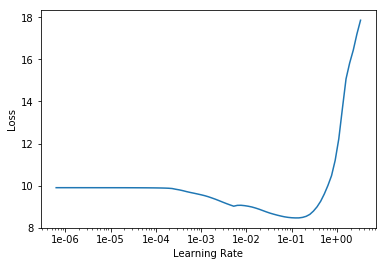

In [83]:
learn.recorder.plot()

In [84]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.832980,2.443747,0.617214


In [85]:
learn.save('first', with_opt=True)

In [86]:
learn.load('first', with_opt=True);

In [87]:
learn.unfreeze()

In [88]:
learn.fit_one_cycle(5, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,2.358468,2.515646,0.605285
2,2.342972,2.435356,0.613342
3,1.866385,2.166854,0.646814
4,1.928004,1.865887,0.693280
5,1.606033,1.757087,0.712020


In [96]:
learn.save('second_sa_lm', with_opt=True)

In [97]:
learn.load('second_sa_lm', with_opt=True);

In [91]:
TEXT = "तस्याः पिता"
N_WORDS = 40
N_SENTENCES = 2

In [92]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

तस्याः पिता ▁राम देवः ▁अभवत् ▁। ▁माता ▁म स् द्र भाई ▁ ▁च ▁। ▁तस्य ▁पितृव्य ः ▁गृह ▁युक्तः ▁आसीत् ▁। ▁सः ▁पाठित वान् ▁अस्य ▁माता ▁श्रीमती ▁पु त की ▁ ▁च ▁। ▁तस्य ▁जन्म ▁राजगृह े ह ▁भवन ी ष क्
तस्याः पिता , त श्च न् ▁ ▁वा ▁तु ▁सं श् ला कं ▁ना ? ▁तर्हि ▁त्वं ▁निष् वीर्य ः ▁। । ▁अर्थात् ▁" सं देव ▁एतत् ▁प्रेम भावः " ▁इति ▁। ▁" स स्यापि ▁प ं ▁यदि ▁अस्ति ▁तर्हि । ▁"


In [93]:
np.exp(1.71)

5.528961477624004